a)

In [11]:
import numpy as np

def buffon_trial(b=0.7, s=1.0):
    theta = np.random.uniform(0, np.pi / 2) # angle of needle
    d = np.random.uniform(0, s / 2) # position of middle of needle
    return (b / 2) * np.sin(theta) >= d # intersection with line?

def estimate_probability(num_trials, b=0.7, s=1.0):
    hits = sum(buffon_trial(b, s) for _ in range(num_trials))
    return hits / num_trials

# Run estimation
P_hat = estimate_probability(1_000_000)
pi_estimate = 2 * 0.7 / (1.0 * P_hat)

P_hat, pi_estimate


(np.float64(0.444831), np.float64(3.147262668294251))

b)

Starting experiments for n = 10
Finished n = 10, std = 0.156327

Starting experiments for n = 20
Finished n = 20, std = 0.111143

Starting experiments for n = 30
Finished n = 30, std = 0.090239

Starting experiments for n = 40
Finished n = 40, std = 0.079396

Starting experiments for n = 50
Finished n = 50, std = 0.070800

Starting experiments for n = 60
Finished n = 60, std = 0.063813

Starting experiments for n = 70
Finished n = 70, std = 0.059391

Starting experiments for n = 80
Finished n = 80, std = 0.055575

Starting experiments for n = 90
Finished n = 90, std = 0.052380

Starting experiments for n = 100
Finished n = 100, std = 0.049965

Starting experiments for n = 110
Finished n = 110, std = 0.047506

Starting experiments for n = 120
Finished n = 120, std = 0.045763

Starting experiments for n = 130
Finished n = 130, std = 0.043553

Starting experiments for n = 140
Finished n = 140, std = 0.041721

Starting experiments for n = 150
Finished n = 150, std = 0.040563

Starting expe

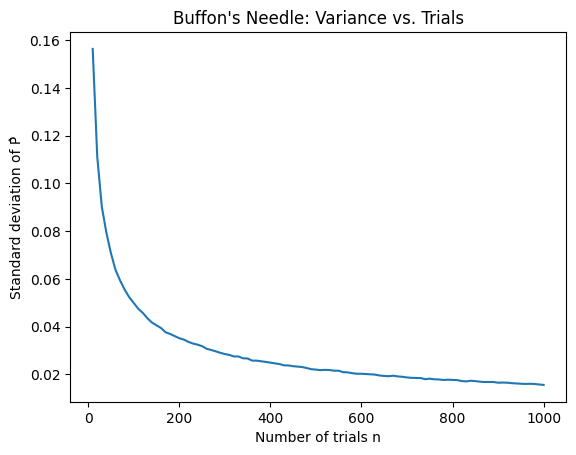

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed

def run_experiments(n, repetitions=10_000, report_step=10_000):
    estimates = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(estimate_probability, n)
                   for _ in range(repetitions)]

        for i, future in enumerate(as_completed(futures), start=1):
            estimates.append(future.result())

            #if i % report_step == 0:
            #    print(f"  n={n}: completed {i}/{repetitions} experiments")

    return np.std(estimates)


n_values = np.arange(10, 1001, 10)
std_devs = []

for n in n_values:
    print(f"Starting experiments for n = {n}")
    std = run_experiments(n)
    std_devs.append(std)
    print(f"Finished n = {n}, std = {std:.6f}\n")

plt.figure()
plt.plot(n_values, std_devs)
plt.xlabel("Number of trials n")
plt.ylabel("Standard deviation of P̂")
plt.title("Buffon's Needle: Variance vs. Trials")
plt.show()


c)

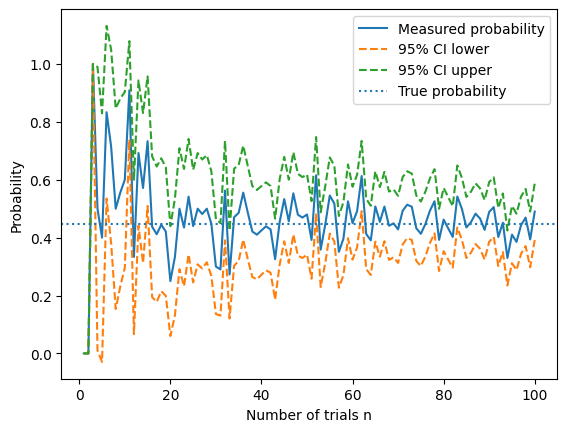

In [15]:
true_P = 2 * b / (s * np.pi)

n_values = np.arange(1, 101)
P_hats = []
lower = []
upper = []

with ThreadPoolExecutor() as executor:
    P_hats = list(executor.map(estimate_probability, n_values))

for n, P_hat in zip(n_values, P_hats):
    margin = 1.96 * np.sqrt(P_hat * (1 - P_hat) / n)
    lower.append(P_hat - margin)
    upper.append(P_hat + margin)

plt.figure()
plt.plot(n_values, P_hats, label="Measured probability")
plt.plot(n_values, lower, "--", label="95% CI lower")
plt.plot(n_values, upper, "--", label="95% CI upper")
plt.axhline(true_P, linestyle=":", label="True probability")
plt.xlabel("Number of trials n")
plt.ylabel("Probability")
plt.legend()
plt.show()


d)

Finished n=1, ratio=1.0000
Finished n=3, ratio=0.2540
Finished n=5, ratio=0.1725
Finished n=4, ratio=0.1290
Finished n=2, ratio=0.5108
Finished n=6, ratio=0.0997
Finished n=7, ratio=0.1400
Finished n=9, ratio=0.0863
Finished n=10, ratio=0.0500
Finished n=8, ratio=0.1480
Finished n=11, ratio=0.1238
Finished n=12, ratio=0.0754
Finished n=15, ratio=0.0656
Finished n=13, ratio=0.0462
Finished n=14, ratio=0.1114
Finished n=16, ratio=0.0734
Finished n=17, ratio=0.0926
Finished n=19, ratio=0.0636
Finished n=18, ratio=0.0925
Finished n=23, ratio=0.0950
Finished n=22, ratio=0.0512
Finished n=20, ratio=0.0787
Finished n=21, ratio=0.0740
Finished n=24, ratio=0.0670
Finished n=27, ratio=0.0800
Finished n=25, ratio=0.0675
Finished n=26, ratio=0.0816
Finished n=30, ratio=0.0644
Finished n=29, ratio=0.0687
Finished n=28, ratio=0.0565
Finished n=32, ratio=0.0762
Finished n=31, ratio=0.0455
Finished n=34, ratio=0.0565
Finished n=37, ratio=0.0713
Finished n=39, ratio=0.0496
Finished n=36, ratio=0.0655
F

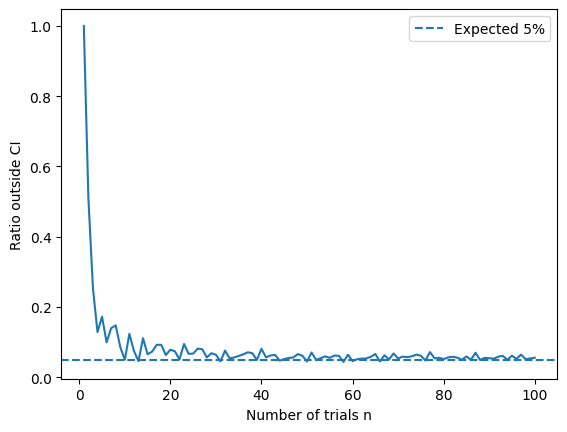

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed

def coverage_ratio(n, experiments=10_000, report_step=1000):
    outside = 0

    for i in range(1, experiments + 1):
        P_hat = estimate_probability(n)
        margin = 1.96 * np.sqrt(P_hat * (1 - P_hat) / n)

        if not (P_hat - margin <= true_P <= P_hat + margin):
            outside += 1

        #if i % report_step == 0:
        #    print(f"  n={n}: completed {i}/{experiments} experiments")

    return outside / experiments


ratios = []

with ThreadPoolExecutor() as executor:
    futures = {executor.submit(coverage_ratio, n): n for n in n_values}

    for future in as_completed(futures):
        n = futures[future]
        ratio = future.result()
        ratios.append((n, ratio))
        print(f"Finished n={n}, ratio={ratio:.4f}")

# Ensure correct ordering for plotting
ratios.sort(key=lambda x: x[0])
n_vals, ratio_vals = zip(*ratios)

plt.figure()
plt.plot(n_vals, ratio_vals)
plt.axhline(0.05, linestyle="--", label="Expected 5%")
plt.xlabel("Number of trials n")
plt.ylabel("Ratio outside CI")
plt.legend()
plt.show()


Task 5.2

      N     r  Mean estimate   Std dev
0     2  0.02       1.011000  0.716156
1     2  0.05       1.048000  0.705476
2     2  0.10       1.041000  0.709450
3     2  0.20       0.969000  0.723905
4     2  0.40       1.022000  0.703929
5     2  0.50       0.991000  0.689144
6    10  0.02       5.003167  1.665738
7    10  0.05       4.983667  1.653955
8    10  0.10       5.091567  1.629481
9    10  0.20       4.971502  1.606128
10   10  0.40       5.009500  1.623055
11   10  0.50       4.963300  1.686572
12   50  0.02      25.088167  3.625761
13   50  0.05      24.914950  3.811533
14   50  0.10      24.847912  3.578758
15   50  0.20      25.016913  3.603698
16   50  0.40      24.805070  3.794584
17   50  0.50      24.905413  3.703804
18  100  0.02      50.032433  4.993918
19  100  0.05      50.140016  5.089427
20  100  0.10      49.946999  5.266171
21  100  0.20      50.234865  5.215524
22  100  0.40      50.015541  5.218928
23  100  0.50      50.154117  5.363814
24  200  0.02     100.152

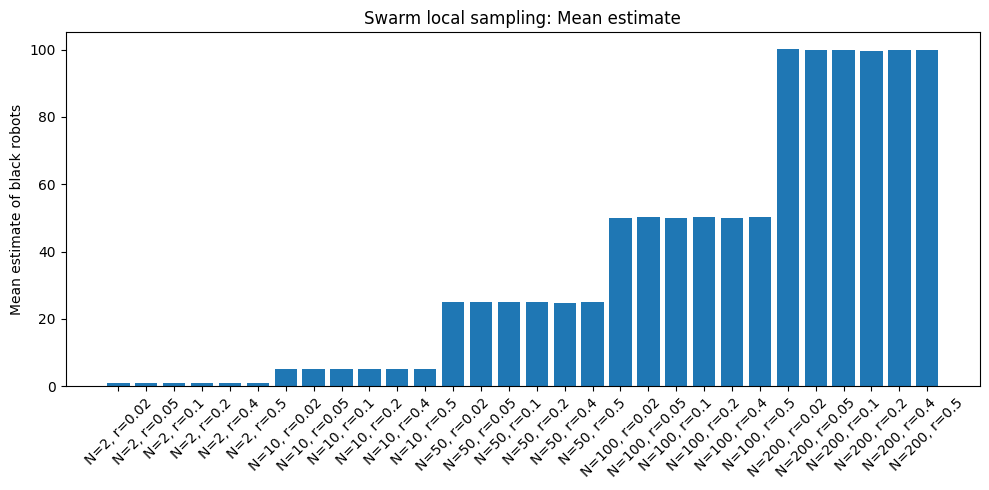

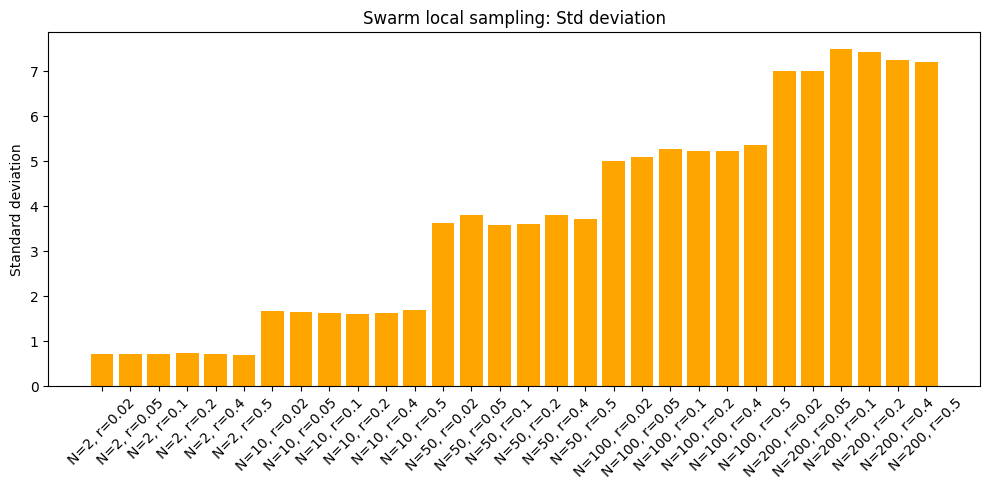

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Swarm experiment function
def swarm_experiment(N, r):
    positions = np.random.rand(N, 2)
    colors = np.random.choice([0, 1], size=N)  # 1 = black

    estimates = []

    for i in range(N):
        distances = np.linalg.norm(positions - positions[i], axis=1)
        neighbors = colors[distances <= r]
        local_ratio = neighbors.mean()
        estimates.append(local_ratio * N)

    return np.mean(estimates)

# Parameters
N_values = [2, 10, 50, 100, 200]
r_values = [0.02, 0.05, 0.1, 0.2, 0.4, 0.5]

# Run experiments
results = {}

for N in N_values:
    for r in r_values:
        estimates = [swarm_experiment(N, r) for _ in range(1000)]
        results[(N, r)] = (np.mean(estimates), np.std(estimates))

# Prepare data for plotting and table
data_rows = []

for (N, r), (mean, std) in results.items():
    data_rows.append({
        "N": N,
        "r": r,
        "Mean estimate": mean,
        "Std dev": std
    })

# Convert to pandas DataFrame
df_results = pd.DataFrame(data_rows)

# Display table
print(df_results)

# Plot mean estimates
plt.figure(figsize=(10, 5))
plt.bar(df_results.index, df_results["Mean estimate"])
plt.xticks(df_results.index, [f"N={row.N}, r={row.r}" for row in df_results.itertuples()], rotation=45)
plt.ylabel("Mean estimate of black robots")
plt.title("Swarm local sampling: Mean estimate")
plt.tight_layout()
plt.show()

# Plot standard deviations
plt.figure(figsize=(10, 5))
plt.bar(df_results.index, df_results["Std dev"], color='orange')
plt.xticks(df_results.index, [f"N={row.N}, r={row.r}" for row in df_results.itertuples()], rotation=45)
plt.ylabel("Standard deviation")
plt.title("Swarm local sampling: Std deviation")
plt.tight_layout()
plt.show()
